<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/decision_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

**Dataset**
*****

In [17]:
X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0,0,0,1,1,1]).reshape(-1, 1)

**Plot Data**
*****

In [29]:
def plot_data(X, y, ax):
  # Find Indices of Positive and Negative Examples
  pos = y == 1
  neg = y == 0
  pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
  neg = neg.reshape(-1,)

  # Plot examples
  ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c = 'red', label='y=1')
  ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=80, label='y=0', facecolors='none', edgecolors='blue', lw=3)
  ax.legend(loc='best')

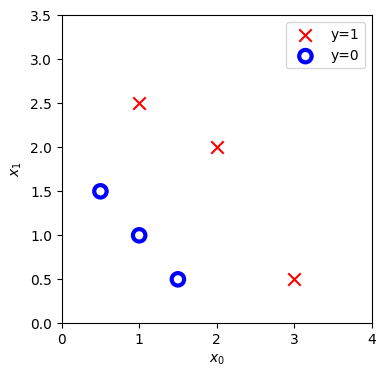

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (4,4))
plot_data(X, y, ax)

ax.axis([0,4,0,3.5])
ax.set_ylabel("$x_1$")
ax.set_xlabel("$x_0$")
plt.show()

**Logistic Regression Model**
*****

In [26]:
# compute the sigmoid of z
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [27]:
# draw a threshold at 0.5
def draw_vthresh(ax,x):
    """ draws a threshold """
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color='blue')
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color='darkred')
    ax.annotate("z >= 0", xy= [x,0.5], xycoords='data',xytext=[30,5],textcoords='offset points')
    d = FancyArrowPatch(posA=(x, 0.5), posB=(x+3, 0.5), color='darkred',arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',)
    ax.add_artist(d)
    ax.annotate("z < 0", xy= [x,0.5], xycoords='data',xytext=[-50,5],textcoords='offset points', ha='left')
    f = FancyArrowPatch(posA=(x, 0.5), posB=(x-3, 0.5), color='blue',arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',)
    ax.add_artist(f)

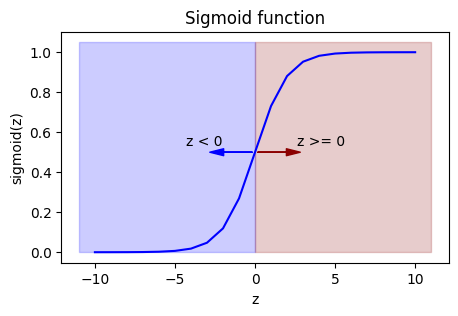

In [34]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10, 11)

fig, ax = plt.subplots(1,1,figsize=(5,3))
# plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c = 'b')

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax, 0)

**Plotting decision boundary**
*****

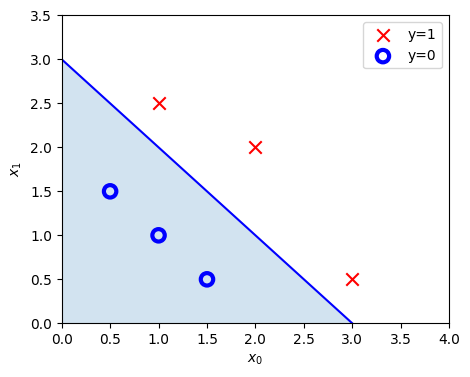

In [37]:
# choose values between 0 and 6
x0 = np.arange(0, 6)

x1 = 3 - x0
fig, ax = plt.subplots(1, 1, figsize=(5,4))
#plot the decision boundary
ax.plot(x0, x1, c='b')
ax.axis([0,4,0,3.5])

# fill the region below the line
ax.fill_between(x0, x1, alpha=0.2)

# plot the original data
plot_data(X, y, ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()